In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Titanic Machine Learning , Prediction**

## **Import Libraries**

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

import warnings
warnings.filterwarnings('ignore')

## **Load Data**

In [3]:
train = pd.read_csv(r'/kaggle/input/titanic/train.csv')
test = pd.read_csv(r'/kaggle/input/titanic/test.csv')
train_test = [train, test]

## **EDA**

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#get object data type
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#explore unique values
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<Axes: xlabel='Cabin'>

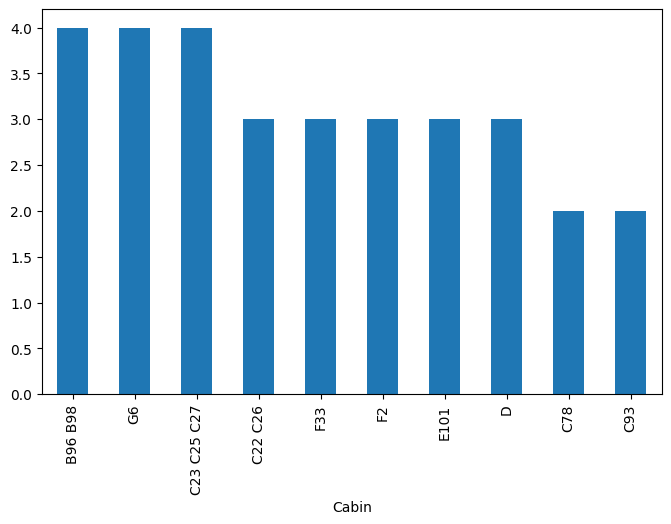

In [10]:
train['Cabin'].value_counts().head(10).plot(kind='bar',figsize=(8,5))

<Axes: xlabel='Embarked'>

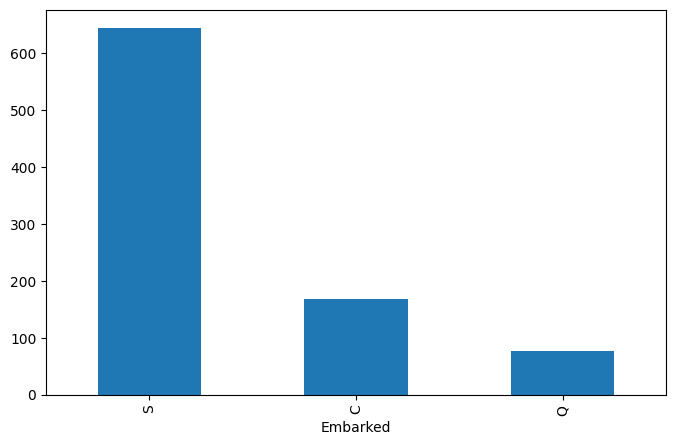

In [11]:
train['Embarked'].value_counts().head(10).plot(kind='bar',figsize=(8,5))

<Axes: xlabel='Embarked'>

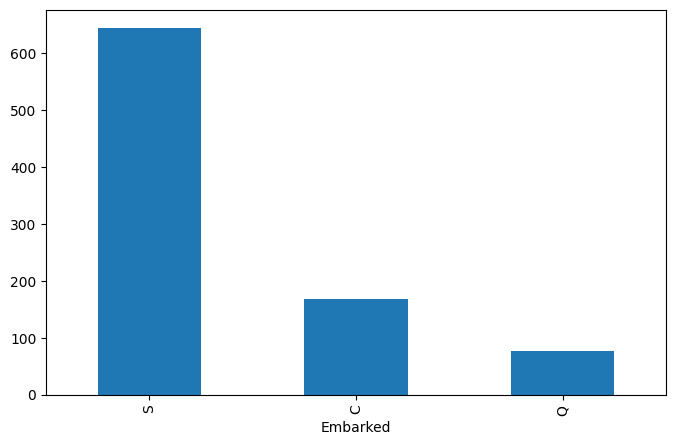

In [12]:
train['Embarked'].value_counts().plot(kind='bar',figsize=(8,5))

<Axes: xlabel='Sex'>

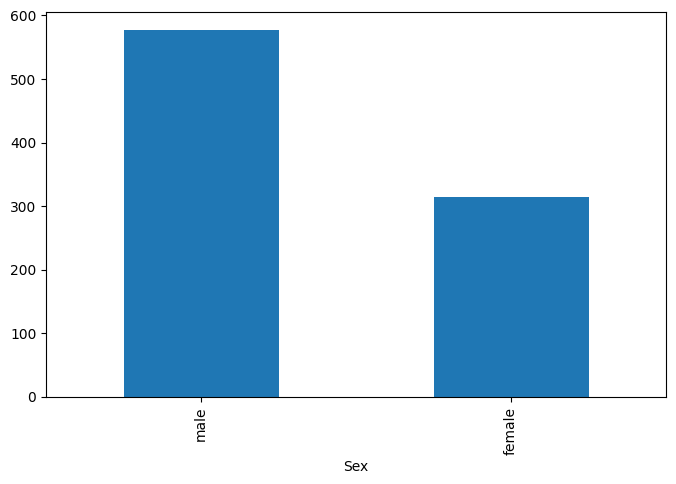

In [13]:
train['Sex'].value_counts().plot(kind='bar',figsize=(8,5))

<Axes: xlabel='Ticket'>

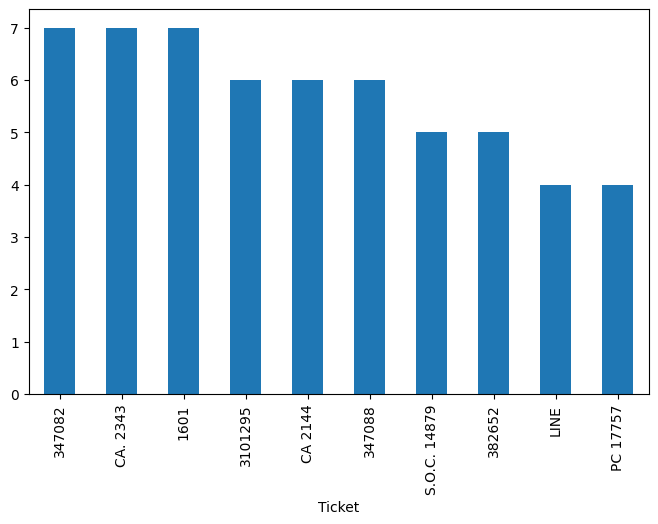

In [14]:
train['Ticket'].value_counts().head(10).plot(kind='bar',figsize =(8,5))

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

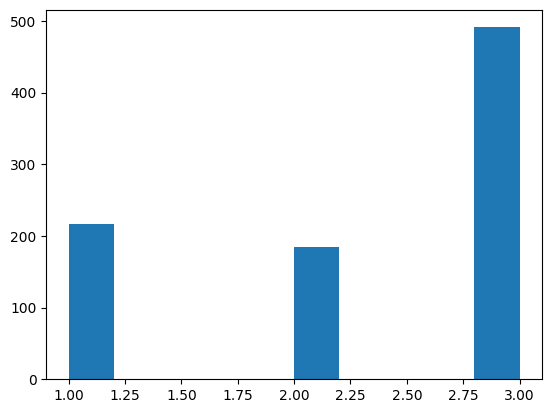

In [15]:
#histogram
plt.hist(train['Pclass'])

## Feature Engineering

In [16]:
for data in train_test:
    data.info()
    print("--------------------------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ----------

In [17]:
for data in train_test:
    print(data.isnull().sum())
    print("---------------------------------------------------------------")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------------------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
---------------------------------------------------------------


### Name

In [18]:
for data in train_test:
    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    print(data['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [19]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for data in train_test:
    data['Title'] = data['Title'].map(title_mapping)
    #drop name
    data.drop('Name',axis=1,inplace=True)

<Axes: xlabel='Title'>

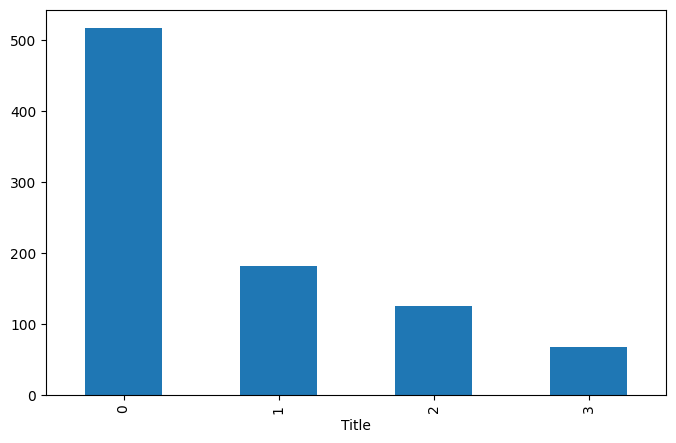

In [20]:
train['Title'].value_counts().plot(kind='bar',figsize=(8,5))

### Sex


In [21]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
for data in train_test:
    le = LabelEncoder()
    le.fit(data['Sex'])
    data['Sex'] = le.transform(data['Sex'])

<Axes: xlabel='Sex'>

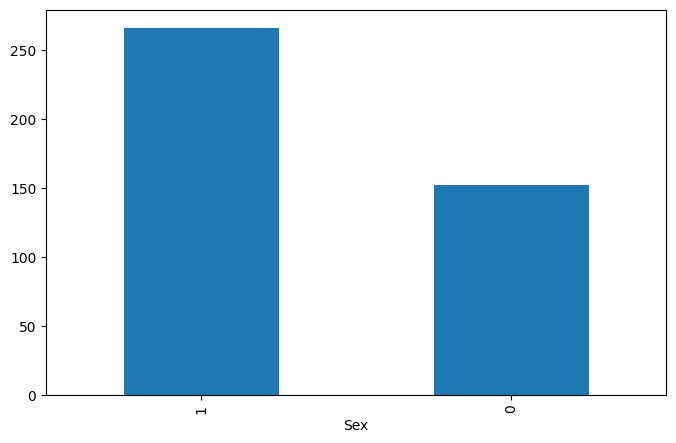

In [22]:
test['Sex'].value_counts().plot(kind='bar',figsize=(8,5))

### Age

In [23]:
test['Age'].value_counts()

Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64

In [24]:
for data in train_test:
    print(data['Age'].isnull().sum())

177
86


In [25]:
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [26]:
#replace null values
for data in train_test:
    data['Age'].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)

In [27]:
train['Age'].isnull().sum()
test['Age'].isnull().sum()

0

In [28]:
#Binning
for data in train_test:
    data.loc[data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 26), 'Age'] = 1
    data.loc[(data['Age'] > 26) & (data['Age'] <= 36), 'Age'] = 2
    data.loc[(data['Age'] > 36) & (data['Age'] <= 62), 'Age'] = 3
    data.loc[data['Age'] > 62, 'Age'] = 4


### PassengerId

In [29]:
#drop PassengerId
train.drop('PassengerId',axis=1,inplace=True)

### Ticket

In [30]:
for data in train_test:
    print(data['Ticket'].value_counts())
    print(data['Ticket'].unique().shape[0])
    print("---------------------------------------------------------------")

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
681
---------------------------------------------------------------
Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64
363
---------------------------------------------------------------


### Embarked

In [31]:
for data in train_test:
    print(data['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


In [32]:
#fill out missing embarked with S
#replace with 0,1,2
for data in train_test:
    data['Embarked'] = data['Embarked'].fillna('S')
    data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

### Fare

In [33]:
for data in train_test:
    print(data['Fare'].value_counts())
    print("---------------------------------------------------------------")

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64
---------------------------------------------------------------
Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64
---------------------------------------------------------------


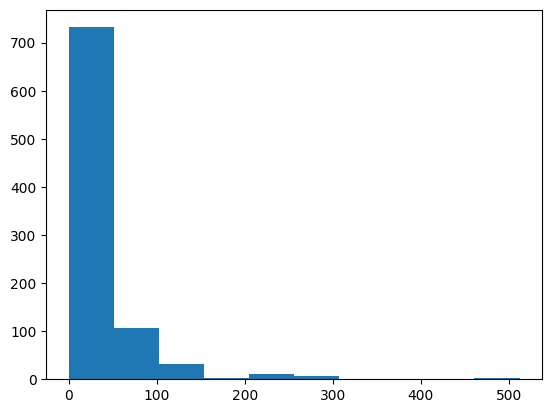

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64
---------------------------------------------------------------


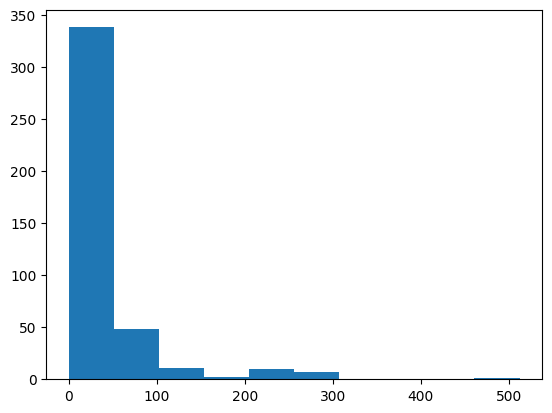

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64
---------------------------------------------------------------


In [34]:
#visualize Fare
for data in train_test:
    plt.hist(data['Fare'])
    plt.show()
    print(data['Fare'].value_counts())
    print("---------------------------------------------------------------")

In [35]:
#replace null values
for data in train_test:
    data['Fare'].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace=True)

In [36]:
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,1,1,0,3.0,1,0,PC 17599,71.2833,C85,1,2
2,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,1,1,0,2.0,1,0,113803,53.1000,C123,0,2
4,0,3,1,2.0,0,0,373450,8.0500,NaN,0,0
5,0,3,1,2.0,0,0,330877,8.4583,NaN,2,0
6,0,1,1,3.0,0,0,17463,51.8625,E46,0,0
7,0,3,1,0.0,3,1,349909,21.0750,NaN,0,3
8,1,3,0,2.0,0,2,347742,11.1333,NaN,0,2
9,1,2,0,0.0,1,0,237736,30.0708,NaN,1,2


In [37]:
#Outilers 
for data in train_test:
    Q1 = data['Fare'].quantile(0.25)
    Q3 = data['Fare'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data['Fare'] = data['Fare'].clip(lower=lower_bound,upper=upper_bound)    

### Cabin

In [38]:
for data in train_test:
    print(data['Cabin'].value_counts())
    print("---------------------------------------------------------------")

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64
---------------------------------------------------------------
Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64
---------------------------------------------------------------


<Axes: xlabel='Cabin'>

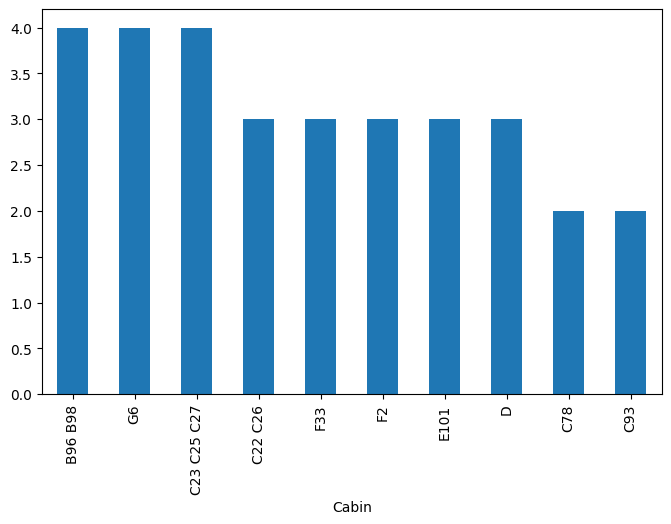

In [39]:
train['Cabin'].value_counts().head(10).plot(kind='bar',figsize=(8,5))

In [40]:
train[train['Pclass']==1]['Cabin'].value_counts()

Cabin
B96 B98        4
C23 C25 C27    4
C22 C26        3
E24            2
E67            2
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 133, dtype: int64

In [41]:
for dataset in train_test:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<Axes: xlabel='Cabin'>

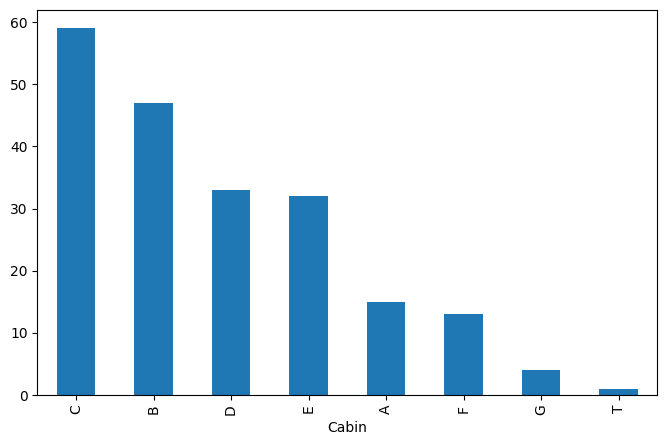

In [42]:
train['Cabin'].value_counts().plot(kind='bar',figsize=(8,5))

In [43]:
train['Cabin'].isnull().sum()

687

In [44]:
#Mapping
for data in train_test:
    data['Cabin'] = data['Cabin'].map( {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8} )
    data['Cabin'] = data['Cabin']

In [45]:
#replace Null Values
for data in train_test:
    data['Cabin'].fillna(train.groupby("Pclass")['Cabin'].transform("median"),inplace=True)

###  FamilySize (Feature Extraction)

In [46]:
for data in train_test:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [47]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

### Ticket , SibSp , Parch

In [48]:
train = train.drop(['Ticket', 'SibSp', 'Parch'], axis=1)
test = test.drop(['Ticket', 'SibSp', 'Parch'], axis=1)

In [49]:
train.head(3)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,1,1.0,7.2500,2.0,0,0,0.4
1,1,1,0,3.0,65.6344,0.8,1,2,0.4
2,1,3,0,1.0,7.9250,2.0,0,1,0.0


In [50]:
train.describe()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,1.713805,24.046813,1.669585,0.361392,0.710438,0.361841
std,0.486592,0.836071,0.477990,0.972672,20.481625,0.540335,0.635673,0.968778,0.645383
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,7.910400,1.600000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,2.000000,14.454200,2.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,31.000000,2.000000,1.000000,1.000000,0.400000
max,1.000000,3.000000,1.000000,4.000000,65.634400,2.800000,2.000000,3.000000,4.000000


In [51]:
train

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,1,1.0,7.2500,2.0,0,0,0.4
1,1,1,0,3.0,65.6344,0.8,1,2,0.4
2,1,3,0,1.0,7.9250,2.0,0,1,0.0
3,1,1,0,2.0,53.1000,0.8,0,2,0.4
4,0,3,1,2.0,8.0500,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,2.0,13.0000,1.8,0,3,0.0
887,1,1,0,1.0,30.0000,0.4,0,1,0.0
888,0,3,0,1.0,23.4500,2.0,0,1,1.2
889,1,1,1,1.0,30.0000,0.8,1,0,0.0


## Model Evaluation

### Split Data

In [52]:
#splitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

### Select Best Models

In [53]:
# apply all single  (Logistic regression,  KNN, Naive bayies, SVM, Decision tree), ensemble (RF, Extratrees, bagging m XGBoosting , gradient boosting , adaboost , voting , and stacking) ML models usign grid search

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Single Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Ensemble Models
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Hyperparameter Grids (Example - Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Naive Bayes': {}, # Add an empty dictionary for Naive Bayes since it doesn't usually require hyperparameter tuning
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [10, 20, 30]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

# Voting and Stacking (Example - Customize estimators and voting method)
estimators = [('rf', best_models['Random Forest']), ('xgb', best_models['XGBoost'])]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')  # or 'hard'
voting_clf.fit(X_train, y_train)
best_models['Voting'] = voting_clf

# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")


Logistic Regression: Best Parameters - {'C': 1}, Best Score - 0.8267096774193549
KNN: Best Parameters - {'n_neighbors': 3}, Best Score - 0.7945935483870967
Naive Bayes: Best Parameters - {}, Best Score - 0.7768903225806452
SVM: Best Parameters - {'C': 0.1, 'kernel': 'linear'}, Best Score - 0.8106451612903225
Decision Tree: Best Parameters - {'max_depth': 5}, Best Score - 0.8170193548387097
Random Forest: Best Parameters - {'n_estimators': 50}, Best Score - 0.8025806451612902
Extra Trees: Best Parameters - {'n_estimators': 200}, Best Score - 0.7881677419354839
Bagging: Best Parameters - {'n_estimators': 20}, Best Score - 0.7961806451612904
AdaBoost: Best Parameters - {'n_estimators': 50}, Best Score - 0.8282967741935483
Gradient Boosting: Best Parameters - {'n_estimators': 100}, Best Score - 0.8442838709677419
XGBoost: Best Parameters - {'learning_rate': 0.01, 'n_estimators': 100}, Best Score - 0.8331225806451613
--- Logistic Regression ---
Accuracy: 0.7873134328358209
Classification Re

### Test Data On Best Model (Voting )

In [54]:
# # Initialize variables to store the best model and best accuracy
# best_model_name = None
# best_model = None
# best_accuracy = 0

# # Evaluate Best Models on Test Set and identify the best one
# for name, model in best_models.items():
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     report = classification_report(y_test, y_pred, digits=4)
    
#     # Print the results for each model
#     print(f"--- {name} ---")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Classification Report:\n{report}")
    
#     # Check if this model has the highest accuracy
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_model_name = name
#         best_model = model

# # Print the best model and its performance
# print(f"\nBest Model: {best_model_name}")
# print(f"Best Accuracy: {best_accuracy:.4f}")


In [55]:
# Predict using the best Voting model
y_pred = best_models['Voting'].predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

# Print the results
print(f"--- Voting Classifier ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")


--- Voting Classifier ---
Accuracy: 0.8134
Classification Report:
              precision    recall  f1-score   support

           0     0.7857    0.9286    0.8512       154
           1     0.8721    0.6579    0.7500       114

    accuracy                         0.8134       268
   macro avg     0.8289    0.7932    0.8006       268
weighted avg     0.8225    0.8134    0.8081       268



In [56]:
Test = test.drop("PassengerId", axis=1).copy()
predicted_value = best_models['Voting'].predict(Test)


In [57]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predicted_value
    })

submission.to_csv('submission.csv', index=False)

# Created By : Fares Ashraf <3